In [1]:
from astropaint import Catalog, Canvas, Painter
from astropaint.profiles import NFW, Battaglia16

import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams["figure.dpi"]=100

# Load the Catalog 

In [2]:
catalog = Catalog("WebSky_2x2")

Catalog loaded from:
/Users/siavashyasini/Dropbox/cosmology/Projects/2020/AstroPaint/astropaint/data/WebSky_2x2.csv
Building the dataframe and updating all the parameters...

Done!


In [3]:
catalog.size

82632

Check out the redshift and mass histograms

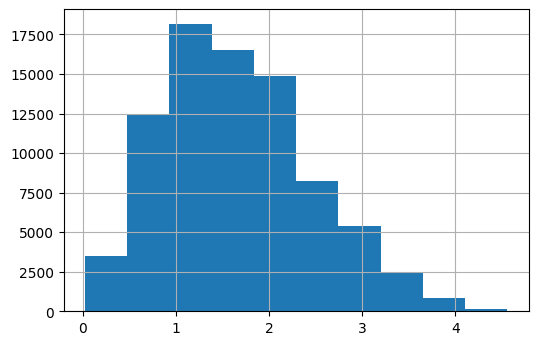

In [4]:
catalog.data.redshift.hist()

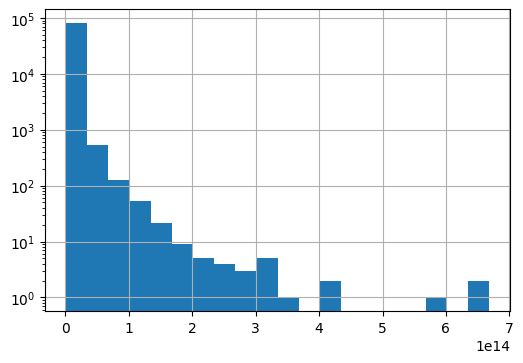

In [5]:
catalog.data.M_200c.hist(bins=20, log=True)

In [6]:
f"Minimum M_200c: {catalog.data.M_200c.min():.2e}"

'Minimum M_200c: 1.28e+12'

In [7]:
catalog.cut_lon_lat(lon_range=[0,1], lat_range=[0,1])
catalog.cut_M_200c(mass_min=1E13)

Catalog data has been modified...

Building the dataframe and updating all the parameters...

Done!
Catalog data has been modified...

Building the dataframe and updating all the parameters...

Done!


In [8]:
catalog.size

1376

# Paint kSZ

In [9]:
nside = 8192
canvas = Canvas(catalog, nside=nside, R_times=4)

88.08582233904805 90.91417766095195 -0.9142315105544221 1.9142315105544223
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


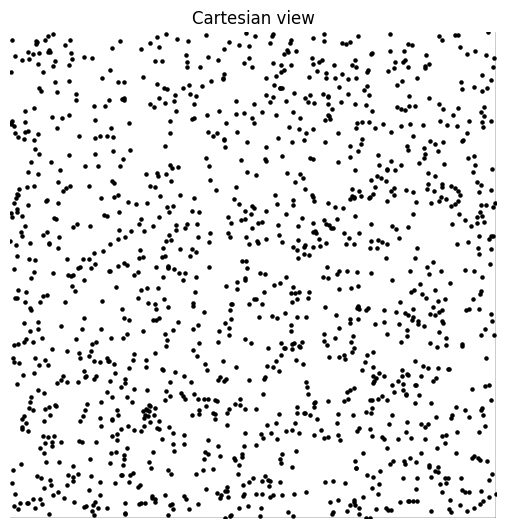

In [10]:
canvas.show_halo_centers("cart", lonra=[0,1], latra=[0,1], s=5, color='k')

In [11]:
painter = Painter(Battaglia16.kSZ_T)
#painter = Painter(NFW.kSZ_T) ## A faster but inaccurate option

The template 'kSZ_T' takes in the following arguments:
['R', 'rho_s', 'R_s', 'v_r']
and the following keyword-only arguments:
['T_cmb']


In [12]:
canvas.clean() #make sure canvas is clean
painter.spray(canvas,
              #cache=True, ## uncomment to cache the profiles to disc; makes the painting slower
             )

Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['v_r', 'R_s', 'rho_s'], dtype='object')
Spraying in parallel...

canvas memory size [GB]: 6.000000089406967

n_cpus = 8
Spraying in 8 batches


/Users/siavashyasini/Dropbox/cosmology/Projects/2020/AstroPaint/astropaint/paint_bucket.py:2529: ComplexWarning: Casting complex values to real discards the imaginary part
  template(**spray_dict))










Your artwork is finished. Check it out with Canvas.show_map()


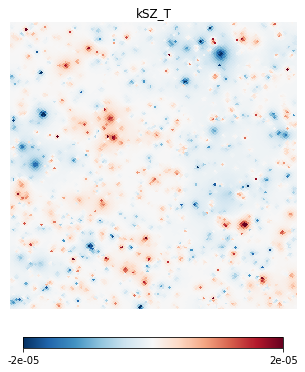

In [76]:
canvas.show_map("cartesian",
                title=f"{painter.template_name}",
                lonra=[0,1], latra=[0,1], 
                min=-2E-5, max=2E-5)